# Project: Investigate TMDb Movie Data

## Table of Contents
<ul>
<li>Introduction</a></li>
<li>Questions</a></li>
<li>Data Wrangling</a></li>
<li>Exploratory Data Analysis</a></li>
<li>Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset chosen for this project was one containing data from over 10,000 movies collected from The Movie Database (TMDb).

In the next few sections, I'll go through most of the data analysis steps, including: asking questions, data wrangling, exploratory data analysis and conclusions. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='questions'></a>
## Research Questions:
<ol>
<li>Does the season in which the movie was released influence revenue?</a></li>
<li>Do movies with higher average rating perform better at the box office?</a></li>
<li>What are the top 10 genres in terms of generated revenue?</a></li>
<li>What are the top 5 directors in terms of generated revenue?</a></li>
</ol>

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# load dataset
df = pd.read_csv('data/tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
# inspecting data 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
# inspecting data 
df.shape

(10866, 21)

The database contains 10866 rows (in this case, movies) and 21 columns

In [5]:
# inspecting data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

There are a few columns containing null values, such as cast, homepage, director, tagline, keywords, among others. 

### Data Cleaning

**1. Drop columns**
- id
- imdb_id
- cast
- keywords
- popularity: popularity is a metric specific from TMDb and for the purposes of this analysis it won't be used in this analysis
- homepage
- budget: budget will be dropped to focus the analysis on numbers in terms of 2010 dollars, accounting for inflation, rather than nominal values. The last two columns of the dataset show the adjusted numbers for budget and revenue. 
- revenue: revenue will be dropped to focus the analysis on numbers in terms of 2010 dollars, accounting for inflation, rather than nominal values. The last two columns of the dataset show the adjusted numbers for budget and revenue. 
- tagline
- overview
- production companies

**2. Drop rows with null values**

**3. Check for duplicates**

- If there are any, drop the duplicated rows
    
**4. Convert columns**
- release_date: convert to datetime

#### DATA CLEANING: Drop Columns

In [6]:
# drop the columns mentioned above
df.drop(columns=['id', 'imdb_id', 'cast', 'keywords', 'popularity', 'homepage', 'budget', 'revenue', 'tagline', 'overview', 'production_companies'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  10866 non-null  object 
 1   director        10822 non-null  object 
 2   runtime         10866 non-null  int64  
 3   genres          10843 non-null  object 
 4   release_date    10866 non-null  object 
 5   vote_count      10866 non-null  int64  
 6   vote_average    10866 non-null  float64
 7   release_year    10866 non-null  int64  
 8   budget_adj      10866 non-null  float64
 9   revenue_adj     10866 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 849.0+ KB


#### DATA CLEANING: Drop rows with any null values

In [7]:
# drop rows with any null values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  10801 non-null  object 
 1   director        10801 non-null  object 
 2   runtime         10801 non-null  int64  
 3   genres          10801 non-null  object 
 4   release_date    10801 non-null  object 
 5   vote_count      10801 non-null  int64  
 6   vote_average    10801 non-null  float64
 7   release_year    10801 non-null  int64  
 8   budget_adj      10801 non-null  float64
 9   revenue_adj     10801 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 928.2+ KB


#### DATA CLEANING: Check for duplicates

In [8]:
df.duplicated().sum()

1

#### DATA CLEANING: Drop duplicates

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
# making sure the duplicated rows were indeed dropped
df.duplicated().sum()

0

#### DATA CLEANING: Convert columns

In [11]:
type(df['release_date'][0])

str

In [12]:
# converting "release_date" from str (object) to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [13]:
# checking to see if it worked 
df['release_date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 10800 entries, 0 to 10865
Series name: release_date
Non-Null Count  Dtype         
--------------  -----         
10800 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 426.8 KB


In [14]:
# final, clean dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   original_title  10800 non-null  object        
 1   director        10800 non-null  object        
 2   runtime         10800 non-null  int64         
 3   genres          10800 non-null  object        
 4   release_date    10800 non-null  datetime64[ns]
 5   vote_count      10800 non-null  int64         
 6   vote_average    10800 non-null  float64       
 7   release_year    10800 non-null  int64         
 8   budget_adj      10800 non-null  float64       
 9   revenue_adj     10800 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 1.2+ MB


In [15]:
# saving clean dataset as a new file
df.to_csv('data/tmdb-movies-clean.csv')

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Does the season in which the movie was released influence revenue?

Seasons (Northern Hemisphere):
- Spring: from March 1 to May 31 
- Summer: from June 1 to August 31
- Fall: from September 1 to November 30
- Winter: from December 1 to February 28 (February 29 in a leap year)

In [16]:
# first, I'll create a new column called "month" using dt.month
df['month'] = df['release_date'].dt.month
df.head(2)

,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
0,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6
1,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5


In [17]:
# now, I'll use the newly created column "month" to create the column "season"
season_dict = {12: 'Winter', 
               1: 'Winter', 
               2: 'Winter', 
               3: 'Spring', 
               4: 'Spring', 
               5: 'Spring', 
               6: 'Summer', 
               7: 'Summer', 
               8: 'Summer', 
               9: 'Fall', 
               10: 'Fall', 
               11: 'Fall'}
        
df['season'] = df['month'].apply(lambda x: season_dict[x])

Note: this [Stack Overflow](https://stackoverflow.com/questions/68183515/add-categorical-season-column-to-dataframe-from-existing-date-column) discussion helped me create the "season" column using a dict, after trying many times using pd.cut unsuccessfully!

In [18]:
# checking to see if the "season" column was created 
df.head()

,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month,season
0,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,Summer
1,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5,Spring
2,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3,Spring
3,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12,Winter
4,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,4,Spring


In [19]:
# now, I'll use groupby to find the average revenue for each season
mean_season = df.groupby('season')['revenue_adj'].mean()
mean_season

season
Fall      3.902994e+07
Spring    5.529255e+07
Summer    6.791397e+07
Winter    4.840812e+07
Name: revenue_adj, dtype: float64

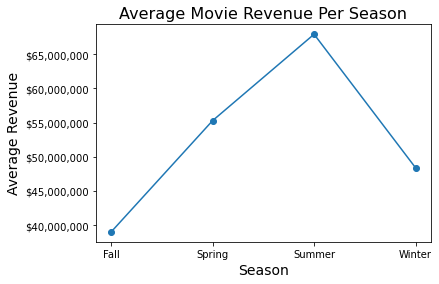

In [20]:
# plotting line chart
fig, ax = plt.subplots()
ax.plot(mean_season, 'o-')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.yaxis.set_tick_params(which='major', labelleft=True, labelright=False)
plt.title('Average Movie Revenue Per Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Revenue', fontsize=14);

Note: the official [Matplotlib documentation](https://matplotlib.org/stable/gallery/pyplots/dollar_ticks.html) and this [Stack Overflow](https://stackoverflow.com/questions/25973581/how-do-i-format-axis-number-format-to-thousands-with-a-comma-in-matplotlib) discussion helped me figure out how to use dollar ticks in the y axis.

<a id='q2'></a>
### Research Question 2: Do movies with higher average rating perform better at the box office?

In [21]:
# summary statistics about the vote_average column
df['vote_average'].describe()

count    10800.000000
mean         5.970880
std          0.933006
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

In [22]:
# creating a new column with vote_average info as ints
df['vote_average_int'] = df['vote_average'].astype(int)
df.head(1)

,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month,season,vote_average_int
0,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,Summer,6


In [23]:
# grouping by vote_average_int 
vote_means = df.groupby(['vote_average_int'])['revenue_adj'].mean()
vote_means

vote_average_int
1    0.000000e+00
2    2.646554e+05
3    3.712962e+06
4    9.799389e+06
5    3.370862e+07
6    6.216557e+07
7    1.049260e+08
8    1.085214e+08
9    0.000000e+00
Name: revenue_adj, dtype: float64

In [24]:
# creating a function to generate bar charts more easily and avoid repeating code unnecessarily
def chart(input):
    fig, ax = plt.subplots()
    ax = input.plot(kind='bar')
    ax.yaxis.set_major_formatter('${x:,.0f}')
    ax.yaxis.set_tick_params(which='major', labelleft=True, labelright=False)

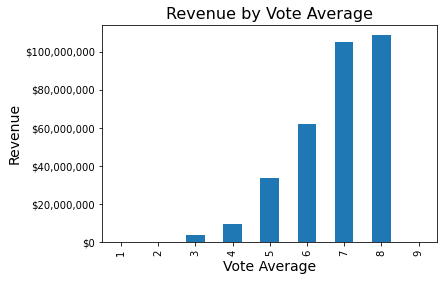

In [25]:
# plotting bar chart
chart(vote_means)
plt.title('Revenue by Vote Average', fontsize=16)
plt.xlabel('Vote Average', fontsize=14)
plt.ylabel('Revenue', fontsize=14);

<a id='q3'></a>
### Research Question 3: What are the top 10 genres in terms of generated revenue?

In [26]:
df_explode = df.assign(genres=df['genres'].str.split('|')).explode('genres')
df_explode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26864 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   original_title    26864 non-null  object        
 1   director          26864 non-null  object        
 2   runtime           26864 non-null  int64         
 3   genres            26864 non-null  object        
 4   release_date      26864 non-null  datetime64[ns]
 5   vote_count        26864 non-null  int64         
 6   vote_average      26864 non-null  float64       
 7   release_year      26864 non-null  int64         
 8   budget_adj        26864 non-null  float64       
 9   revenue_adj       26864 non-null  float64       
 10  month             26864 non-null  int64         
 11  season            26864 non-null  object        
 12  vote_average_int  26864 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(4), object(4)
memory usage

Note: this [discussion](https://knowledge.udacity.com/questions/690451#690660) at the Udacity forum and this  [geeksforgeeks](https://www.geeksforgeeks.org/convert-list-like-column-elements-to-separate-rows-in-pandas/) post helped me create rows for each genre associated with a given movie. 

In [27]:
df_explode.head()

,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month,season,vote_average_int
0,Jurassic World,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,Summer,6
0,Jurassic World,Colin Trevorrow,124,Adventure,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,Summer,6
0,Jurassic World,Colin Trevorrow,124,Science Fiction,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,Summer,6
0,Jurassic World,Colin Trevorrow,124,Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,Summer,6
1,Mad Max: Fury Road,George Miller,120,Action,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5,Spring,7


In [28]:
# retrieving the sum of revenue grouped by genre, sorted by descending order
top_genres = df_explode.groupby('genres')['revenue_adj'].sum().sort_values(ascending=False)

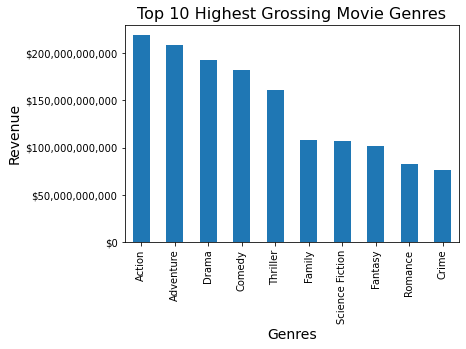

In [29]:
# using the chart function to generate the bar chart and limiting the first 10 results to get the TOP 10 genres
chart(top_genres.iloc[:10])
plt.title('Top 10 Highest Grossing Movie Genres', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Revenue', fontsize=14);

<a id='q4'></a>
### Research Question 4: What are the top 5 directors in terms of generated revenue?

In [30]:
# info on the director column
df['director'].info()

<class 'pandas.core.series.Series'>
Int64Index: 10800 entries, 0 to 10865
Series name: director
Non-Null Count  Dtype 
--------------  ----- 
10800 non-null  object
dtypes: object(1)
memory usage: 426.8+ KB


In [31]:
# checking to see if there are any movies with more than one director 
df_explode_dir = df.assign(director=df['director'].str.split('|')).explode('director')

In [32]:
# there are indeed new rows once I separated the directors
df_explode_dir.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11855 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   original_title    11855 non-null  object        
 1   director          11855 non-null  object        
 2   runtime           11855 non-null  int64         
 3   genres            11855 non-null  object        
 4   release_date      11855 non-null  datetime64[ns]
 5   vote_count        11855 non-null  int64         
 6   vote_average      11855 non-null  float64       
 7   release_year      11855 non-null  int64         
 8   budget_adj        11855 non-null  float64       
 9   revenue_adj       11855 non-null  float64       
 10  month             11855 non-null  int64         
 11  season            11855 non-null  object        
 12  vote_average_int  11855 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(4), object(4)
memory usage

In [33]:
# retrieving the sum of revenue grouped by director, sorted by descending order
top_directors = df_explode_dir.groupby('director')['revenue_adj'].sum().sort_values(ascending=False)

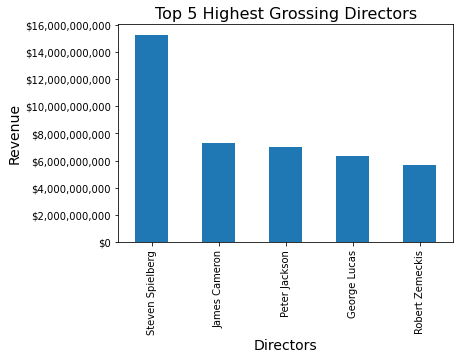

In [34]:
# use the chart function to generate the bar chart and limiting the first 5 results to get the TOP 5 directors
chart(top_directors.iloc[:5])
plt.title('Top 5 Highest Grossing Directors', fontsize=16)
plt.xlabel('Directors', fontsize=14)
plt.ylabel('Revenue', fontsize=14);

<a id='conclusions'></a>
## Conclusions and Limitations

#### Research Question 1: Does the season in which the movie was released influence revenue?

- Taking into account merely *mean* revenue, the data seem to suggest there is a difference in average revenue of movies depending on the season. Movies launched during the summer tend to perform better at the box office. On the other hand, fall releases presented the lowest average revenue. 
- Limitations: the revenue column accounts for worldwide revenue, while the "season" column was created to reflect the seasons in the northern hemisphere alone. 

#### Research Question 2: Do movies with higher average rating perform better at the box office?
- There might be a positive relationship between average rating of a given movie and its revenue, at least for the TMDb users.
- Limitations: some accuracy was lost using vote average as ints instead of floats. Also, the average rating of users in the TMDb platform might not be representative of the population.

#### Research Question 3: What are the top 10 genres in terms of generated revenue?
- The top 10 genres are: action, adventure, drama, comedy, thriller, family, science fiction, fantasy, romance and crime.
- Limitations: it's almost impossible to reduce a movie to a single genre. Also, some genres might be more generic than others. For instance, both Star Wars: The Force Awakens (2015) and Furious 7 (2015) could be classified as an "action" movie, while being totally different in tone and subject matter. While Furious 7 was also classified as "crime" and "thriller", Star Wars: The Force Awakens was also tagged as "Adventure", "Science Fiction" and "Fantasy". 

#### Research Question 4: What are the top 5 directors in terms of generated revenue?
- The top 5 highest grossing directors are: Steven Spielberg, James Cameron, Peter Jackson, George Lucas and Robert Zemeckis.
- Limitations: There is no data available from 2016 onwards. Since then, there might be directors whose movies have had higher accumulated revenue than the five just mentioned above.